In [1]:
!pip install ultralytics

In [2]:
import torch
torch.cuda.is_available()

False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
!ls "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split"

train  val


In [15]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split" /content/

^C


In [16]:
!find /content/blood_cell_images_split/ -name ".DS_Store" -type f -delete

In [21]:
# Optional: remove empty folders just in case
import os, shutil
for root, dirs, files in os.walk("/content/blood_cell_images_split", topdown=False):
    for d in dirs:
        folder_path = os.path.join(root, d)
        if not os.listdir(folder_path):
            shutil.rmtree(folder_path)

In [22]:
train_classes = sorted(os.listdir("/content/blood_cell_images_split/train"))
val_classes = sorted(os.listdir("/content/blood_cell_images_split/val"))
print("Train classes:", train_classes)
print("Val classes:", val_classes)
print("Number of train classes:", len(train_classes))
print("Number of val classes:", len(val_classes))

Train classes: ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']
Val classes: ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']
Number of train classes: 5
Number of val classes: 5


In [23]:
import os

image_extensions = (".png", ".jpg", ".jpeg")

for split in ["train", "val"]:
    split_path = f"/content/blood_cell_images_split/{split}"
    print(f"\nChecking {split_path}:")
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            # count only files with image extensions
            num_images = len([f for f in os.listdir(cls_path) if f.lower().endswith(image_extensions)])
            print(f" - {cls}: {num_images} images")
        else:
            print(f" ⚠️ Not a folder: {cls}")


Checking /content/blood_cell_images_split/train:
 - erythroblast: 800 images
 - seg_neutrophil: 800 images
 - myeloblast: 800 images
 - basophil: 800 images
 - monocyte: 800 images

Checking /content/blood_cell_images_split/val:
 - erythroblast: 200 images
 - seg_neutrophil: 200 images
 - myeloblast: 200 images
 - basophil: 200 images
 - monocyte: 200 images


In [24]:
# Double-check classes again
train_path = "/content/blood_cell_images_split/train"
print("Classes YOLO will see:", os.listdir(train_path))

Classes YOLO will see: ['erythroblast', 'seg_neutrophil', 'myeloblast', 'basophil', 'monocyte']


In [25]:
val_path = "/content/blood_cell_images_split/val"
print("Classes YOLO will see:", os.listdir(val_path))

Classes YOLO will see: ['erythroblast', 'seg_neutrophil', 'myeloblast', 'basophil', 'monocyte']


In [26]:
from ultralytics import YOLO

# Load YOLO classification model (nano version is small/fast)
model = YOLO("yolov8n-cls.pt")

# Train
model.train(
    data="/content/blood_cell_images_split",
    epochs=5,
    imgsz=128,
    batch=4
)

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/blood_cell_images_split, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train17, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a893e9eeba0>
curves: []
curves_results: []
fitness: 0.9975000023841858
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9950000047683716, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9975000023841858}
save_dir: PosixPath('/content/runs/classify/train17')
speed: {'preprocess': 0.0045426770084304735, 'inference': 5.418265905023873, 'loss': 0.00021238302360870875, 'postprocess': 0.0004592440091073513}
task: 'classify'
top1: 0.9950000047683716
top5: 1.0

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
# Run validation to get metrics
metrics = model.val()

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/blood_cell_images_split/train... found 4000 images in 5 classes ✅ 
val: /content/blood_cell_images_split/val... found 1000 images in 5 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 661.2±271.9 MB/s, size: 17.3 KB)
val: Scanning /content/blood_cell_images_split/val... 1000 images, 0 corrupt: 100% ━━━━━━━━━━━━ 1000/1000 1.3Mit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 250/250 24.2it/s 10.4s
                   all      0.995          1
Speed: 0.0ms preprocess, 6.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/train172


In [29]:
# Get confusion matrix as numpy array
cm = metrics.confusion_matrix.matrix  # shape = (num_classes, num_classes)

In [30]:
# Convert to integers
cm_int = cm.astype(int)

In [31]:
# Get class names from the model
class_names = [model.names[i] for i in range(len(model.names))]

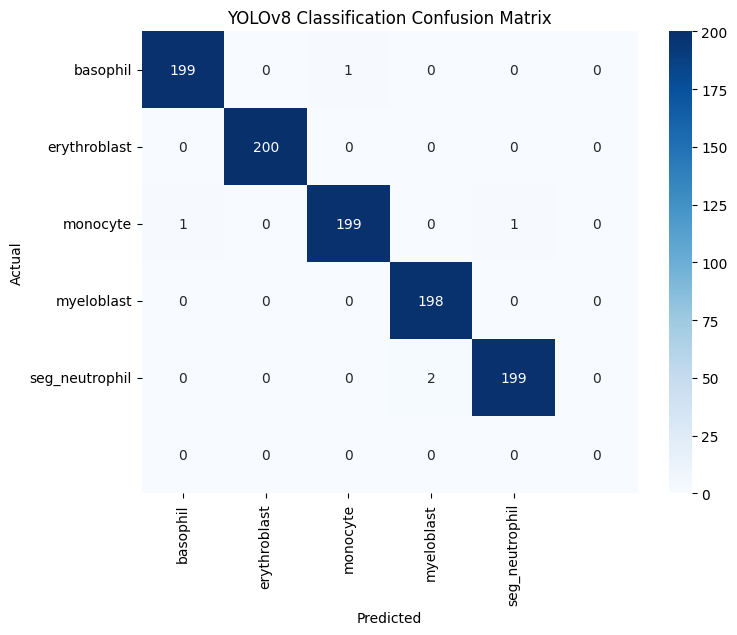

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_int, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('YOLOv8 Classification Confusion Matrix')
plt.show()

In [33]:
from google.colab import files
files.download('/content/runs/classify/train17/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>